In [1]:
#=
Written by: Matt Liqua

Problem:
Assuming simply support beam

Boundary condtions:
y1 = 0
y4 = 0

Equation:
d^2y / dx^2 - (T(y) / 2(E)(I)) = (q(x)(L-x)/ 2(E)(I))

Given:
T = 7200 lb
q = 5400 lb / in
L = 75 in
E = 30 * 10^6 PSI
I = 120 in^4
Choose 3 segments
=#

In [2]:
# Givens
E = 30.0e6
I = 120.0
q = 5400.0
T = 7200.0
L = 75
y0 = 0.0 # boundary condtion
yf = 0.0 # boundary condtion
;

In [3]:
function finiteDiffBeam(y0,yf,dx,L,E,I,q,T)
    x = 0.0:dx:L
    A = zeros(length(x),length(x)) # equation matrix
    B = zeros(length(x))

    A[1,1] = 1
    A[length(x),length(x)] = 1
    B[1] = y0
    B[length(x)] = yf
    
    for i in 2:length(x)-1
         A[i,i-1] = 1/(dx)^2
         A[i,i] = -2/(dx)^2 - ( T / (E*I) )
         A[i,i+1] =1/(dx)^2
    
         B[i] = ( q*x[i]*(L-x[i]) ) / (2*E*I)
    end
    
    return x, (T = A \ B)
    
end
;

In [4]:
xDis, yDis = finiteDiffBeam(y0,yf,25,L,E,I,q,T)


(x = 0.0:25.0:75.0, T = [0.0, -0.5852059925093632, -0.5852059925093632, 0.0])

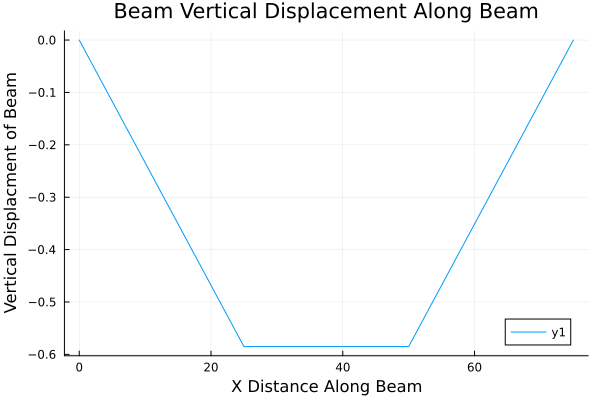

In [5]:
using Plots
plot(xDis, yDis, xlabel = "X Distance Along Beam", ylabel = "Vertical Displacment of Beam", title = "Beam Vertical Displacement Along Beam")